# Sampling Example in `pandas`
Based on the example from _Inferential Thinking_, Chapter 10:

<http://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html>

The Jupyter notebook source of this document is available online at:

<https://github.com/jcausey-astate/Sampling_in_pandas/blob/master/Sampling_Example_in_pandas.ipynb>



In [1]:
# Load the required modules:
import pandas as pd
import numpy as np

The data is available in the file [top_movies.csv](https://raw.githubusercontent.com/data-8/textbook/gh-pages/data/top_movies.csv)
We will load it now:

In [2]:
top = pd.read_csv("top_movies.csv")
top.head(10)

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


The lines:
```{py}
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')

top.set_format(make_array(3, 4), NumberFormatter)
```
are not required with the Pandas dataframe; it is already indexed, 
and the numeric columns are already numeric.

### Deterministic Samples
We can use `loc` and indexing notation instead of `take`:

In [3]:
top.loc[[3,18,100],:]

,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
18,Spider-Man,Sony,403706375,604517300,2002
100,Gone with the Wind,MGM,198676459,1757788200,1939


Or, we can use `iloc` and only select rows:  "*index* location"

In [4]:
top.iloc[[3,18,100]]

,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
18,Spider-Man,Sony,403706375,604517300,2002
100,Gone with the Wind,MGM,198676459,1757788200,1939


What is the difference between these two?
         

`loc` expects values matching the "Index" column, while `iloc` expects zero-based integer indexing.  In this case, the two are the same... But that is not always the case.  

The Index column used  by `loc` is created either when the DataFrame is loaded or explicitly later, and the Index values will "stick" to their respective samples (rows) if they are re-ordered, unless you choose to re-index or preserve index.  

The `iloc` style indexing always starts at zero and it always literally counts the rows as they appear at that moment in the DataFrame.

One other difference is that the Index column does not always have to be integers (and does not have to start from zero).  This is just the default if you load data without supplying an explicit Index.

In [5]:
# Running a conditional filter against a column produces a Sequence that is a 
# boolean mask; this can be used to mask rows in a dataframe 
# (as shown in the next cell).
top['Title'].str.contains("Harry Potter").head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Title, dtype: bool

In [6]:
selected_rows = top['Title'].str.contains("Harry Potter")
top[selected_rows]

,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004


### Systematic Sample

In [7]:
"""Choose a random start among rows 0 through 9; then take every 10th row."""
start = np.random.choice(np.arange(10))
top.loc[np.arange(start, top.shape[0], 10)].head(10)

,Title,Studio,Gross,Gross (Adjusted),Year
7,Star Wars,Fox,460998007,1549640500,1977
17,The Hunger Games,Lionsgate,408010692,442510400,2012
27,The Passion of the Christ,NM,370782930,519432100,2004
37,Alice in Wonderland (2010),Buena Vista (Disney),334191110,365718600,2010
47,Star Wars: Episode II - Attack of the Clones,Fox,310676740,465175700,2002
57,The Sixth Sense,Buena Vista (Disney),293506292,500938400,1999
67,The Hangover,Warner Bros.,277322503,323343300,2009
77,Raiders of the Lost Ark,Paramount,248159971,770183000,1981
87,The Lost World: Jurassic Park,Universal,229086679,434216600,1997
97,Austin Powers: The Spy Who Shagged Me,New Line,206040086,352863900,1999


# Empirical Distributions

In [8]:
die = pd.DataFrame(np.arange(1,7,1), columns=["Face"])
die

,Face
0,1
1,2
2,3
3,4
4,5
5,6


### A Probability Distribution

<AxesSubplot: ylabel='Frequency'>

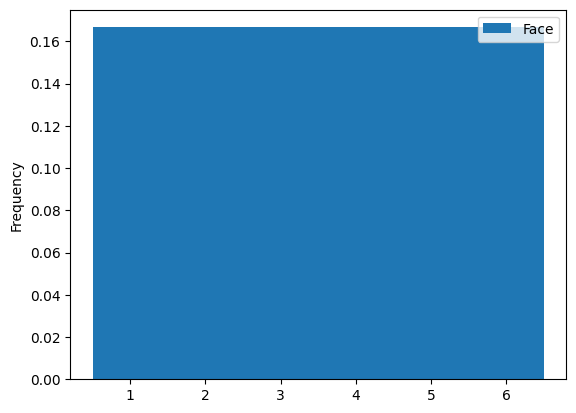

In [9]:
die_bins = np.arange(0.5, 6.6, 1)
die.plot.hist( bins = die_bins, density=True )

### Empirical Distributions

In [10]:
# This can simulate as many rolls as we like. Here are 10:
die.sample(10, replace=True)

,Face
0,1
0,1
4,5
2,3
2,3
5,6
4,5
1,2
1,2
4,5


### Empirical Histograms

In [11]:
# (Talk about the potential bad coding style of this!!!)
def empirical_hist_die(n):
    die.sample(n, replace=True).plot.hist(bins=die_bins, density=True)

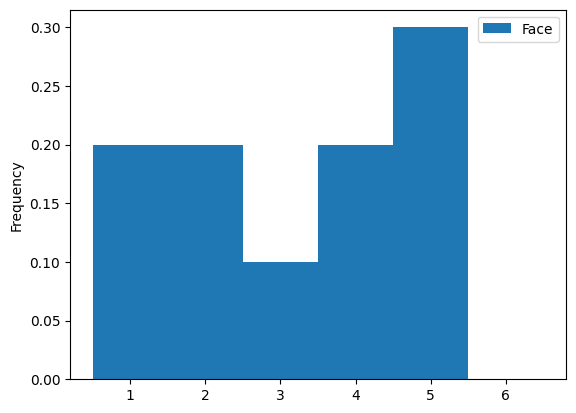

In [12]:
empirical_hist_die(10)

When the sample size increases, the empirical histogram begins to look more like the histogram of theoretical probabilities.

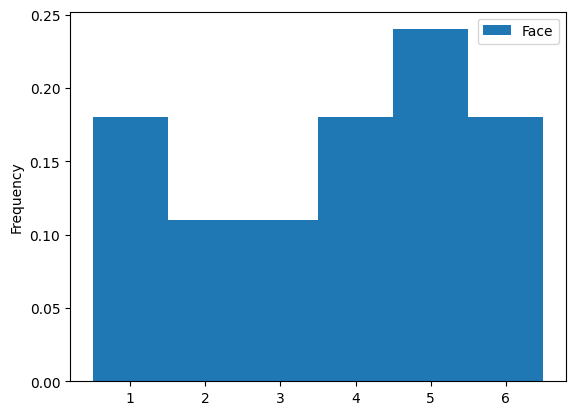

In [13]:
empirical_hist_die(100)

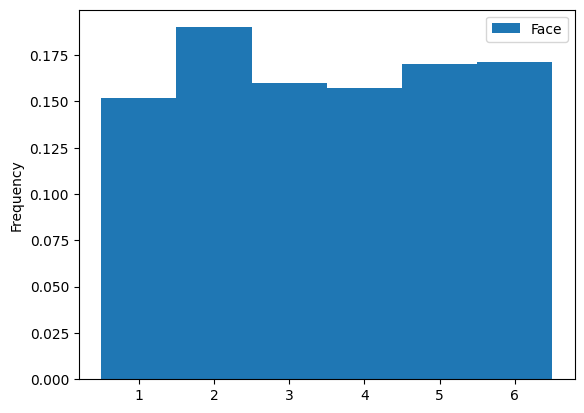

In [14]:
empirical_hist_die(1000)

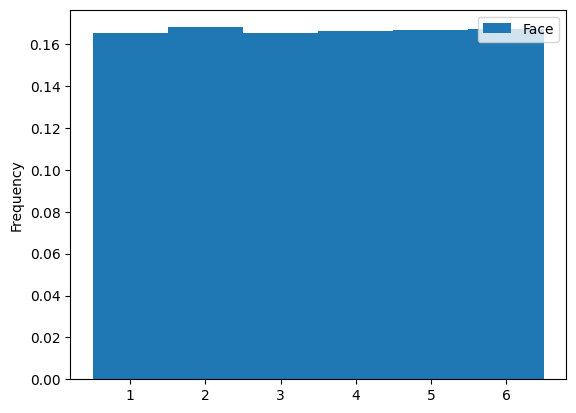

In [15]:
empirical_hist_die(100000)

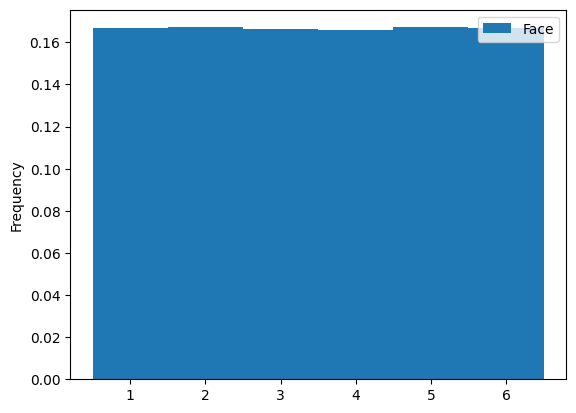

In [16]:
empirical_hist_die(1000000)

### The Law of Averages

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appears gets closer and closer to 1/6.

Here “independently and under identical conditions” means that every repetition is performed in the same way regardless of the results of all the other repetitions.

## Sampling from a Population
This data is available at [united_summer2015.csv](https://raw.githubusercontent.com/data-8/textbook/gh-pages/data/united_summer2015.csv),
and was originally from the [Bureau of Transportation Statistics](http://www.transtats.bts.gov/Fields.asp?Table_ID=293)

In [17]:
united = pd.read_csv("united_summer2015.csv")
united.head(10)

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [18]:
united.Delay.min()

-16

In [19]:
# Or, with index operator:
united['Delay'].min()

-16

In [20]:
united['Delay'].max()

580

Text(0, 0.5, 'Percent of minute')

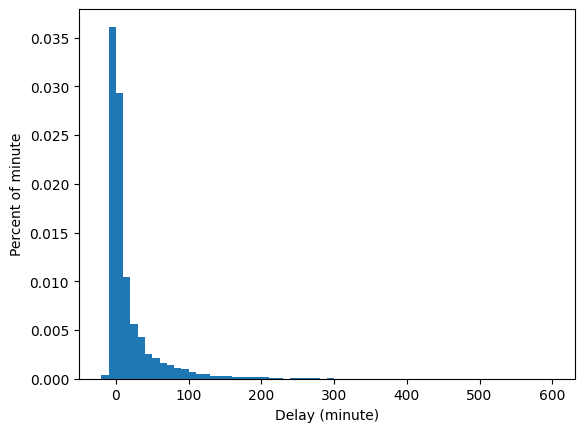

In [21]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
ax = united['Delay'].plot.hist(bins=delay_bins, density=True, sharex=True, sharey=True)
ax.set_xlabel("Delay (minute)")
ax.set_ylabel("Percent of minute")

In [22]:
selected_rows = united['Delay'] > 200
selected_rows.sum() / united.shape[0]

0.008390596745027125

In [23]:
# A different way of expressing the previous calculation.
(united['Delay'] > 200).sum() / united.shape[0]

0.008390596745027125

The code above demonstrates that conditional tests against columns of a DataFrame (or a whole DataFrame, or any NumPy `array`) return an object that is Pandas/Numpy compatible.  Above, the parentheses are used to group the conditional test and the object that results is "dotted" to get the sum directly.

This ability can save code sometimes, but at the expense of readability; choose whichever way you find most easy to follow in a particular situation.